In [1]:
from IPython.display import HTML
from utils.quick_draw import QuickDrawModel

In [2]:
# 手書き絵の認識モデルに関するクラスを定義します
qd = QuickDrawModel()

In [3]:
# 学習用とテストデータの総数を確認する
qd.show_dataset_num()

学習用データ　　　: 4500000個
テスト用データ　　: 250000個
ラベルのクラス数　: 345個


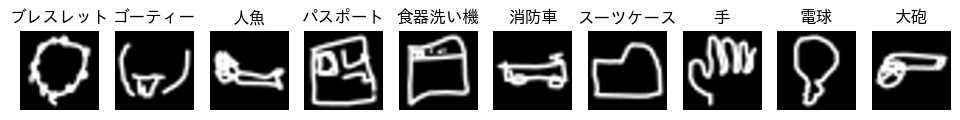

In [4]:
# データセットを確認
qd.show_random_images_and_labels(10)

In [5]:
# 学習済みモデルをロード
path = "speed_sketch_dash/models/model.onnx"
model = qd.load_pretrained_model(path)

In [6]:
# 学習済みモデルを表示
HTML(qd.plot_model())

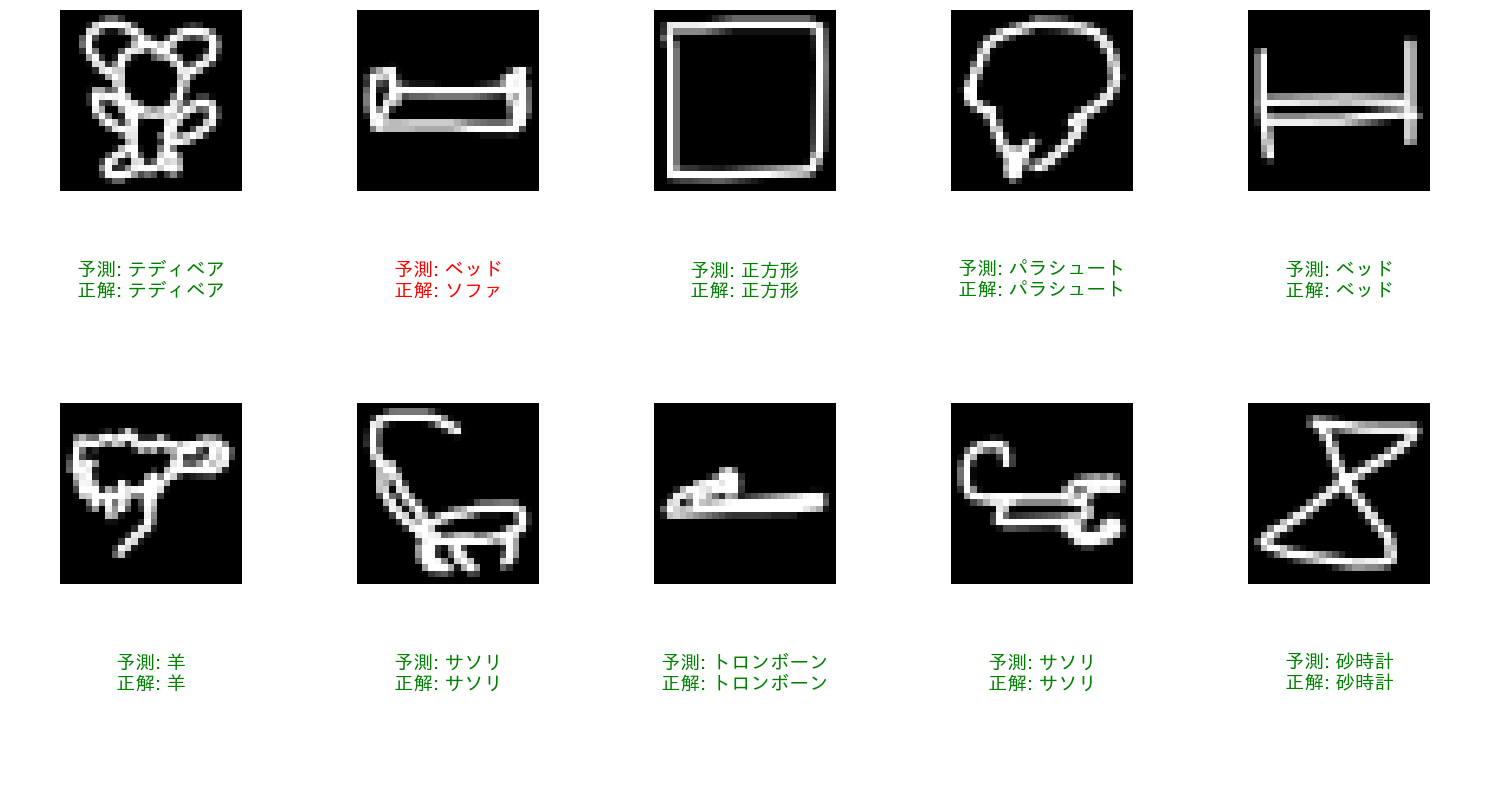

In [9]:
qd.predict_and_show(model)

In [9]:
# 必要なライブラリをインポートします
from utils import draw_game    # ユーティリティライブラリからdraw_gameをインポート
import gradio as gr            # デモアプリを作るために必要なgradioライブラリをインポート
import time                    # 時間関連の操作を行うためにtimeライブラリをインポート

# JavaScriptコードを定義します（ブラウザでのポップアップに使用）
js = "(x) => confirm(x)"

# ゲーム用に使用するクラスを定義します
game = draw_game.DrawGame(model)

# Gradioアプリケーションの構築を開始します
with gr.Blocks() as app:
    # ゲームのタイトルと説明を表示します
    gr.Markdown("<div style='text-align: center;'><h1>手描き絵認識ゲーム</h1><h3>3分間に指示された絵を書いて高スコアを狙おう</h3></div>")
    
    # 画面のレイアウトを設定します
    with gr.Row():
        # 画面の左側のレイアウトを設定します
        with gr.Column(scale=5):
            # ユーザー名を入力するためのテキストボックスを作成します
            user_name = gr.Textbox(label="ユーザー名")
            # ゲーム開始とリセットのためのボタンを配置します
            with gr.Row():
                start_button = gr.Button("ゲーム開始")
                reset_button = gr.Button("リセット")
            # ゲームの説明や指示を表示するためのテキストボックスを配置します
            output1 = gr.Textbox(label="説明", interactive=False)
            # ユーザーが数字を描くためのキャンバスを配置します
            image_input = gr.Image(
                source="canvas",
                shape=(200, 200),
                image_mode='L',
                tool='color-sketch',
                invert_colors=True
            ).style(width=800, height=400)
            # 判定とクリアのためのボタンを配置します
            with gr.Row():
                submit_button = gr.Button("判定")
                clear_button = gr.Button("クリア")
            # 判定結果を表示するためのテキストボックスを配置します
            output2 = gr.Textbox(label="結果", interactive=False)
        # 画面の右側のレイアウトを設定します
        with gr.Column(scale=5):
            # モデルの予測結果を表示するためのラベルを配置します
            output3 = gr.Label(label='予測結果', num_top_classes=5, scale=2)
            # スコアボードとランキングを表示するためのテキストボックスを配置します
            with gr.Row():
                score_board = gr.Textbox(label="スコア", value="", lines=15, scale=1)
                total_ranking = gr.Textbox(label="ランキング", value="", lines=15, scale=2)

    # それぞれのボタンに対して、クリックされたタイミングで実行される処理を定義します
    start_button.click(fn=game.start_game, inputs=[output2, user_name, gr.State(False)], outputs=[output1, total_ranking])
    reset_button.click(fn=game.start_game, inputs=[output2, user_name, gr.State(True)], outputs=[output1, total_ranking])
    clear_button.click(fn=lambda x: None, inputs=image_input, outputs=image_input)
    submit_button.click(
        fn=game.recognize_drawing,
        inputs=[output1, output2, image_input],
        outputs=[output1, output2, output3, image_input, score_board]
    )
    # 「説明」のテキストボックスと「結果」のテキストボックスに文字が入力された場合に、実行される処理を定義します
    output1.change(
        fn=None, inputs=output1, outputs=None, _js=js
    )
    output2.change(
        fn=game.start_game, inputs=output2, outputs=[output1, total_ranking], _js=js if time.time() > game.end_time else None
    )

# Gradioアプリケーションを起動します
app.queue().launch(share=True, server_port=7861)

/var/tmp/ipykernel_1125224/288495231.py:30: GradioDeprecationWarning: The `style` method is deprecated. Please set these arguments in the constructor instead.
  image_input = gr.Image(


Running on local URL:  http://127.0.0.1:7861
Running on public URL: https://ec0f03c7dbed62fd3a.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/gradio/queueing.py", line 407, in call_prediction
    output = await route_utils.call_process_api(
  File "/opt/conda/lib/python3.10/site-packages/gradio/route_utils.py", line 226, in call_process_api
    output = await app.get_blocks().process_api(
  File "/opt/conda/lib/python3.10/site-packages/gradio/blocks.py", line 1550, in process_api
    result = await self.call_function(
  File "/opt/conda/lib/python3.10/site-packages/gradio/blocks.py", line 1185, in call_function
    prediction = await anyio.to_thread.run_sync(
  File "/opt/conda/lib/python3.10/site-packages/anyio/to_thread.py", line 33, in run_sync
    return await get_async_backend().run_sync_in_worker_thread(
  File "/opt/conda/lib/python3.10/site-packages/anyio/_backends/_asyncio.py", line 2106, in run_sync_in_worker_thread
    return await future
  File "/opt/conda/lib/python3.10/site-packages/anyio/_backends/_asyncio.py", line 833, in run
